# Beer Rating Prediction

### Importing Libraries 

In [95]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

### The dataset

In [96]:
data = pd.read_csv('train.csv')

In [97]:
data.shape

(37500, 19)

In [98]:
data.describe()

,index,beer/ABV,beer/beerId,beer/brewerId,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/timeUnix,user/ageInSeconds,user/birthdayUnix
count,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.00000,37500.000000,37500.000000,3.750000e+04,7.856000e+03,7.856000e+03
mean,24951.887573,7.403725,21861.152027,3036.595120,3.900053,3.873240,3.88944,3.854867,3.922440,1.232794e+09,1.176705e+09,2.416303e+08
std,14434.009669,2.318145,18923.130832,5123.084675,0.588778,0.680865,0.70045,0.668068,0.716504,7.190955e+07,3.375514e+08,3.375514e+08
min,0.000000,0.100000,175.000000,1.000000,0.000000,1.000000,0.00000,1.000000,1.000000,9.262944e+08,7.034366e+08,-2.208960e+09
25%,12422.500000,5.400000,5441.000000,395.000000,3.500000,3.500000,3.50000,3.500000,3.500000,1.189194e+09,9.794810e+08,1.433628e+08
50%,24942.500000,6.900000,17538.000000,1199.000000,4.000000,4.000000,4.00000,4.000000,4.000000,1.248150e+09,1.100009e+09,3.183264e+08
75%,37416.750000,9.400000,34146.000000,1315.000000,4.500000,4.500000,4.50000,4.500000,4.500000,1.291330e+09,1.274973e+09,4.388544e+08
max,49999.000000,57.700000,77207.000000,27797.000000,5.000000,5.000000,5.00000,5.000000,5.000000,1.326267e+09,3.627295e+09,7.148988e+08


### Display initial data structure and missing values

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              37500 non-null  int64  
 1   beer/ABV           37500 non-null  float64
 2   beer/beerId        37500 non-null  int64  
 3   beer/brewerId      37500 non-null  int64  
 4   beer/name          37500 non-null  object 
 5   beer/style         37500 non-null  object 
 6   review/appearance  37500 non-null  float64
 7   review/aroma       37500 non-null  float64
 8   review/overall     37500 non-null  float64
 9   review/palate      37500 non-null  float64
 10  review/taste       37500 non-null  float64
 11  review/text        37490 non-null  object 
 12  review/timeStruct  37500 non-null  object 
 13  review/timeUnix    37500 non-null  int64  
 14  user/ageInSeconds  7856 non-null   float64
 15  user/birthdayRaw   7856 non-null   object 
 16  user/birthdayUnix  785

In [100]:
print("\nMissing Values Per Column:")
print(data.isnull().sum())


Missing Values Per Column:
index                    0
beer/ABV                 0
beer/beerId              0
beer/brewerId            0
beer/name                0
beer/style               0
review/appearance        0
review/aroma             0
review/overall           0
review/palate            0
review/taste             0
review/text             10
review/timeStruct        0
review/timeUnix          0
user/ageInSeconds    29644
user/birthdayRaw     29644
user/birthdayUnix    29644
user/gender          22186
user/profileName         5
dtype: int64


In [101]:
print("\nSample Data:")
print(data.head())


Sample Data:
   index  beer/ABV  beer/beerId  beer/brewerId                  beer/name  \
0  40163       5.0        46634          14338                   Chiostro   
1   8135      11.0         3003            395   Bearded Pat's Barleywine   
2  10529       4.7          961            365       Naughty Nellie's Ale   
3  44610       4.4          429              1            Pilsner Urquell   
4  37062       4.4         4904           1417  Black Sheep Ale (Special)   

                beer/style  review/appearance  review/aroma  review/overall  \
0     Herbed / Spiced Beer                4.0           4.0             4.0   
1      American Barleywine                4.0           3.5             3.5   
2  American Pale Ale (APA)                3.5           4.0             3.5   
3           Czech Pilsener                3.0           3.0             2.5   
4         English Pale Ale                4.0           3.0             3.0   

   review/palate  review/taste  \
0            4

### Get details about the dataFrame and its columns

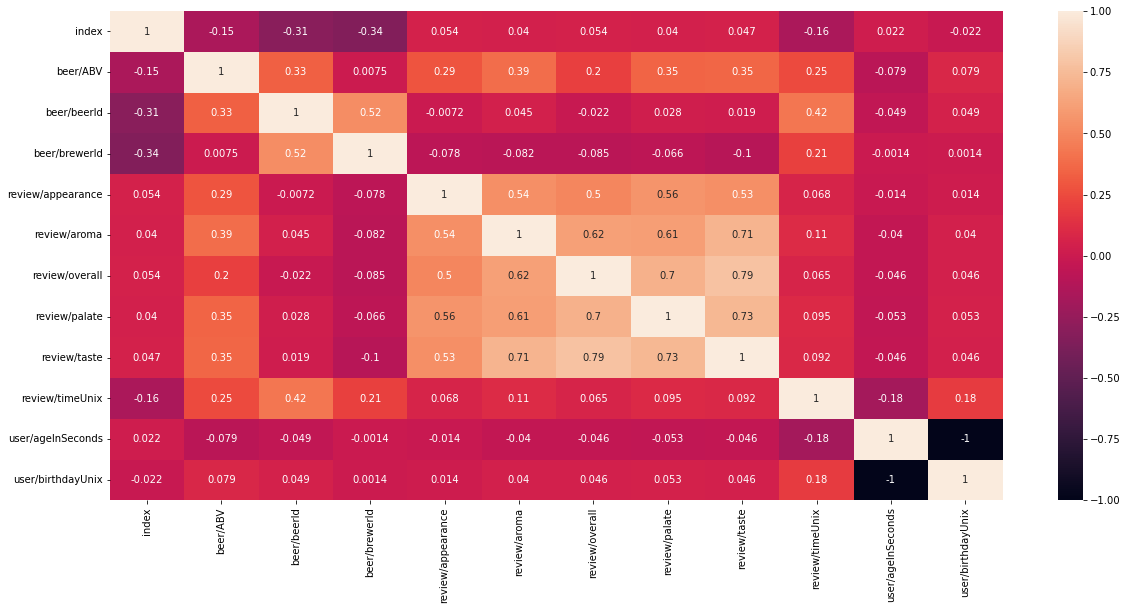

In [102]:
plt.figure(figsize = (20,9))
sns.heatmap(data.corr(),annot=True)
plt.show()

#### Displaying heatmap for visualizing correlation amongst columns
#### The most significant factor which is impacting

###  Drop rows where the target variable (review/overall) is missing

In [103]:
data = data.dropna(subset=['review/overall'])

review/overall
0.0    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
1.0    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
1.5    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
2.0    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
2.5    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
3.0    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
3.5    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
4.0    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
4.5    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
5.0    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
dtype: object

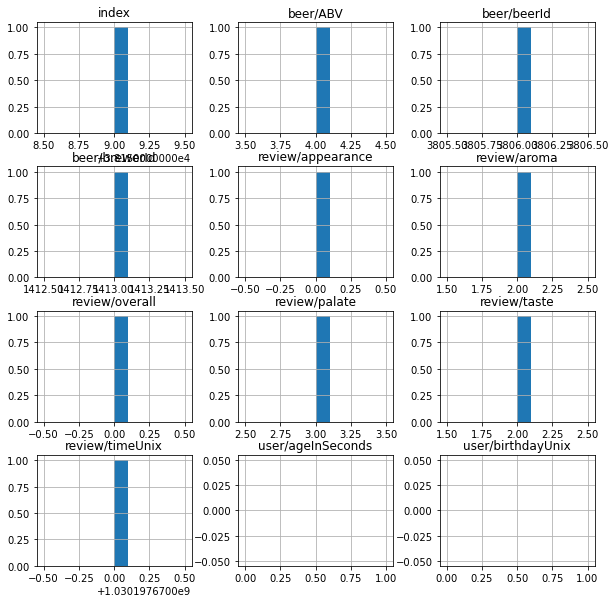

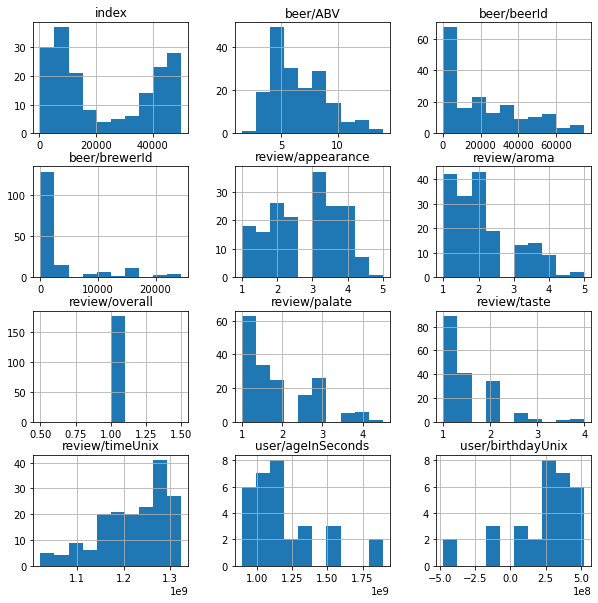

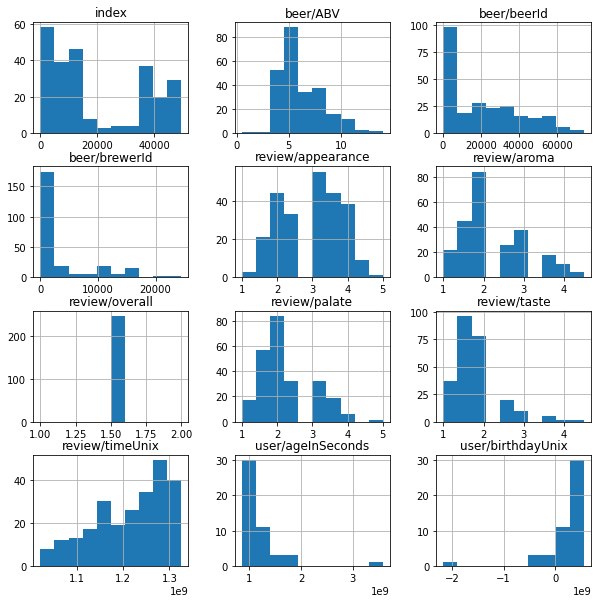

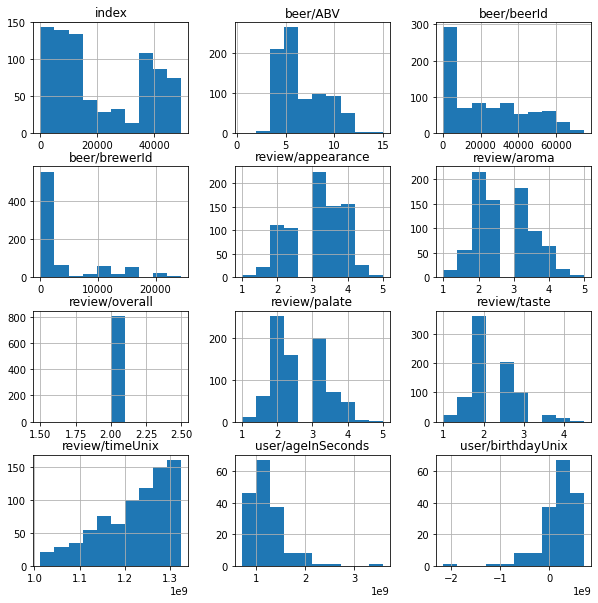

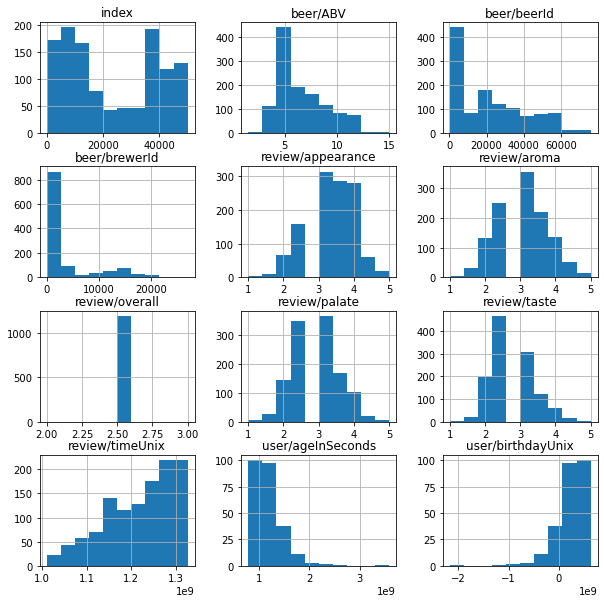

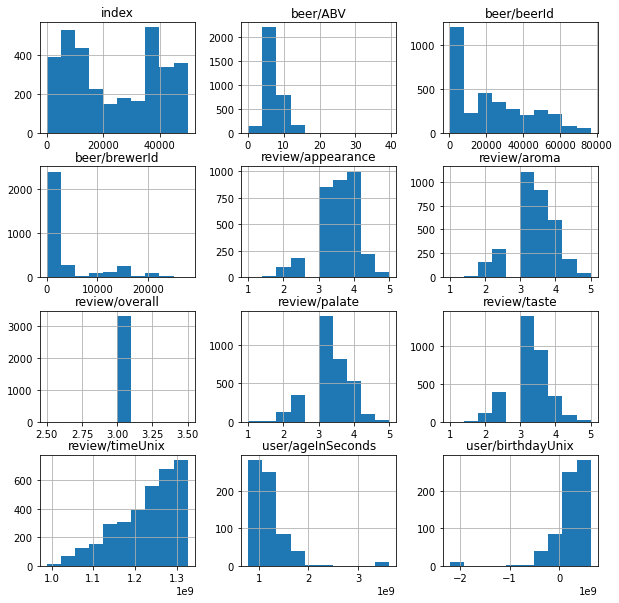

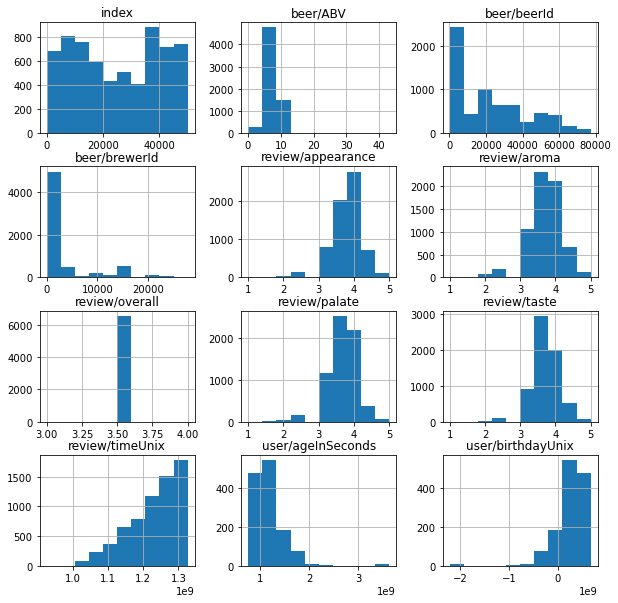

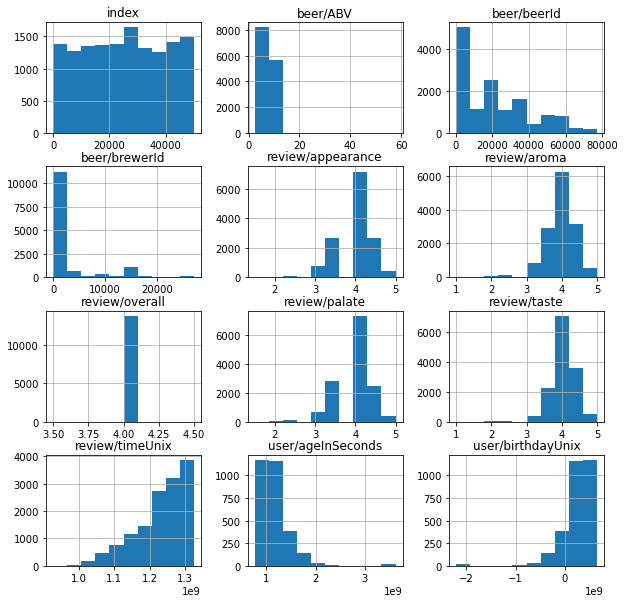

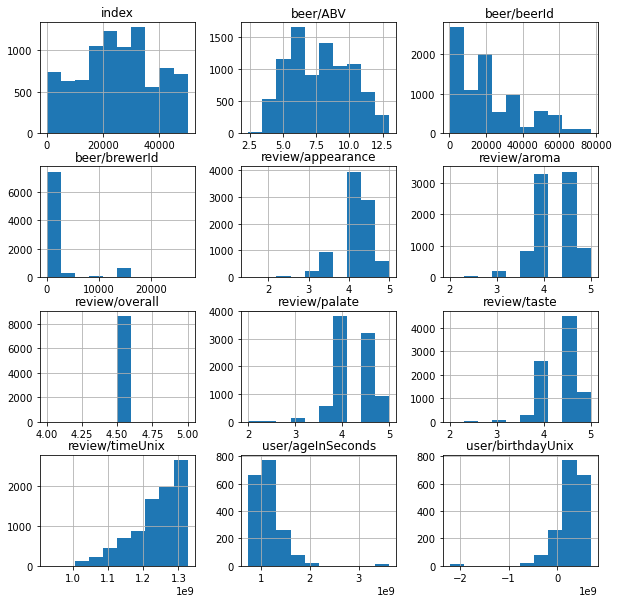

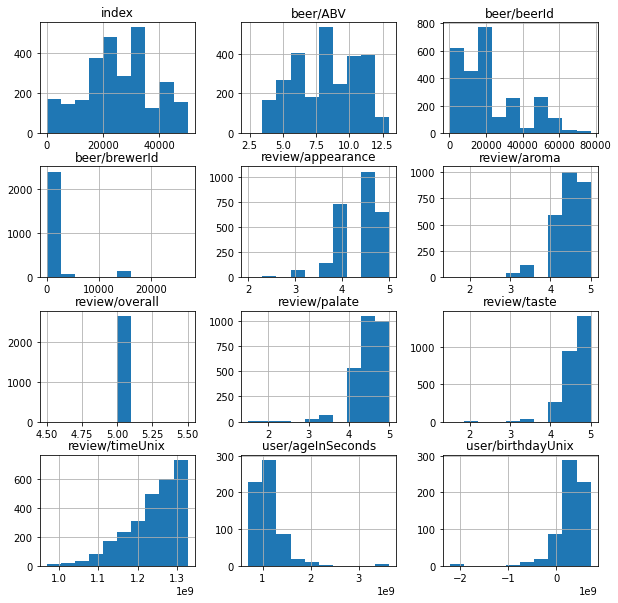

In [10]:
data.groupby('review/overall').hist(figsize=(10,10))

### Fill missing ABV values with the median ABV

In [104]:
data['beer/ABV'].fillna(data['beer/ABV'].median(), inplace=True)

### Creating a 'user_age' feature from 'user/ageInSeconds' if available

In [105]:
data['user_age'] = data['user/ageInSeconds'] / (365.25 * 24 * 3600)
data['user_age'].fillna(data['user_age'].median(), inplace=True)

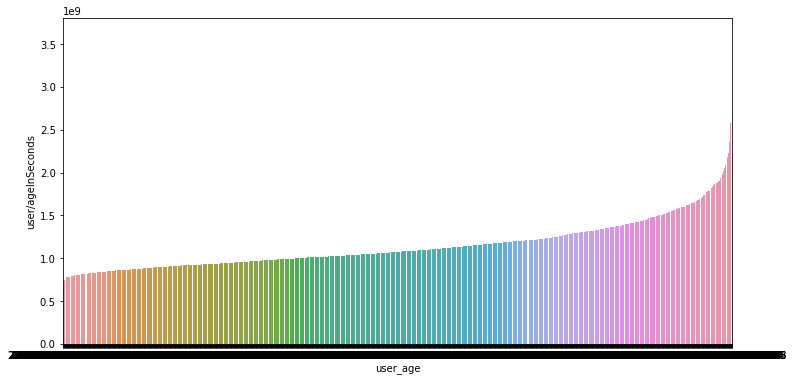

In [13]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'user_age', y = 'user/ageInSeconds', data=data)
plt.show()

### Fill missing values in review ratings with the median value

In [106]:
for col in ['review/appearance', 'review/aroma', 'review/palate', 'review/taste']:
    data[col].fillna(data[col].median(), inplace=True)

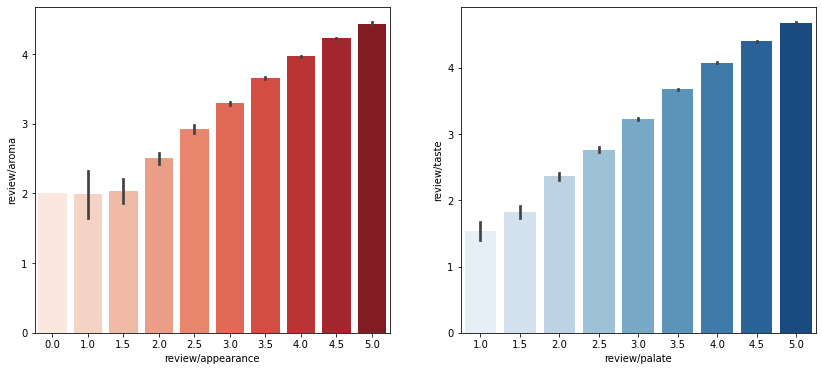

In [15]:
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.barplot(x = 'review/appearance', y = 'review/aroma', data=data, palette = 'Reds')
plt.subplot(1,2,2)
sns.barplot(x = 'review/palate', y = 'review/taste', data=data , palette = 'Blues')
plt.show()

### Drop irrelevant columns with unique identifiers or unnecessary data

In [107]:
data.drop(columns=['index', 'beer/beerId', 'beer/brewerId', 'beer/name', 
                 'user/profileName', 'review/timeStruct', 'review/timeUnix', 
                 'user/birthdayRaw', 'user/birthdayUnix', 'user/ageInSeconds'], 
        inplace=True, errors='ignore')

### Text processing for `review/text` using TF-IDF
### Initialize TF-IDF vectorizer

In [108]:
tfidf = TfidfVectorizer(max_features=100, stop_words='english')
text_features = tfidf.fit_transform(data['review/text'].fillna('')).toarray()

### Convert TF-IDF text features into a DataFrame

In [109]:
text_features_df = pd.DataFrame(text_features, columns=tfidf.get_feature_names_out())

### Combine TF-IDF text features with main DataFrame

In [110]:
data = pd.concat([data, text_features_df], axis=1)

### Drop `review/text` column after processing

In [111]:
data.drop(columns=['review/text'], inplace=True)

### One-hot encode categorical features like `beer/style` and `user/gender`

In [112]:
data = pd.get_dummies(data, columns=['beer/style', 'user/gender'], drop_first=True)

In [113]:
data.columns = data.columns.str.strip()  
data.columns = data.columns.str.lower()  

In [114]:
print(data.columns)

Index(['beer/abv', 'review/appearance', 'review/aroma', 'review/overall',
       'review/palate', 'review/taste', 'user_age', 'abv', 'aftertaste',
       'alcohol',
       ...
       'beer/style_scottish ale',
       'beer/style_scottish gruit / ancient herbed ale',
       'beer/style_smoked beer', 'beer/style_tripel',
       'beer/style_vienna lager', 'beer/style_weizenbock',
       'beer/style_wheatwine', 'beer/style_winter warmer',
       'beer/style_witbier', 'user/gender_male'],
      dtype='object', length=202)


In [115]:
print(data.head())

   beer/abv  review/appearance  review/aroma  review/overall  review/palate  \
0       5.0                4.0           4.0             4.0            4.0   
1      11.0                4.0           3.5             3.5            3.5   
2       4.7                3.5           4.0             3.5            3.5   
3       4.4                3.0           3.0             2.5            3.0   
4       4.4                4.0           3.0             3.0            3.5   

   review/taste   user_age  abv  aftertaste  alcohol  ...  \
0           4.0  34.857183  0.0    0.288713      0.0  ...   
1           3.0  34.857183  0.0    0.000000      0.0  ...   
2           3.5  34.857183  0.0    0.000000      0.0  ...   
3           3.0  38.337106  0.0    0.000000      0.0  ...   
4           2.5  34.857183  0.0    0.000000      0.0  ...   

   beer/style_scottish ale  beer/style_scottish gruit / ancient herbed ale  \
0                        0                                               0   
1 

In [116]:
data.columns = data.columns.str.strip()  # Remove leading/trailing spaces
data.columns = data.columns.str.replace(' ', '_')  # Replace spaces with underscores (optional)

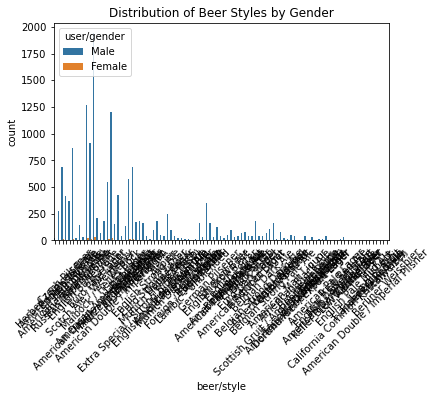

In [39]:
sns.countplot(x='beer/style', hue='user/gender', data=data)
plt.xticks(rotation=45)  # Rotate labels if needed for readability
plt.title('Distribution of Beer Styles by Gender')
plt.show()

### Define Features and Target Variable

In [117]:
X = data.drop(columns=['review/overall'])
y = data['review/overall']

### Split data into training and testing sets

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Training with RandomForestRegressor

In [119]:
model = RandomForestRegressor(random_state=42, n_jobs=-1)

### Hyperparameter tuning with GridSearchCV

In [120]:
param_grid = {
    'n_estimators': [50, 100],  # Fewer values
    'max_depth': [10, None],    # Fewer values
}

grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

### Model Evaluation

In [121]:
y_pred = best_model.predict(X_test)

### Calculate evaluation metrics

In [122]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')

Root Mean Squared Error (RMSE): 0.39837349731101784
Mean Absolute Error (MAE): 0.30319343866109644


### Plotting feature importance for top 10 features

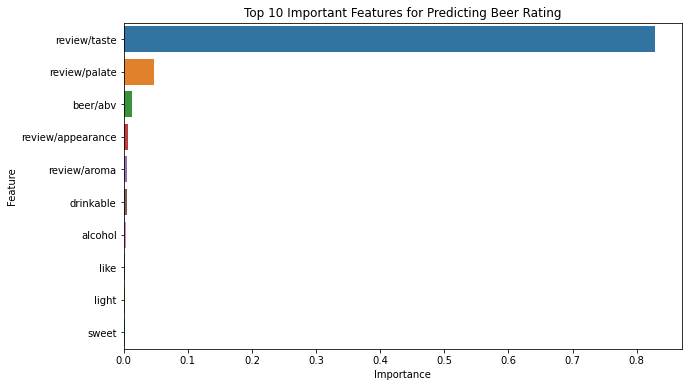

In [123]:
feature_importances = best_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title("Top 10 Important Features for Predicting Beer Rating")
plt.show()

In [124]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [134]:
from sklearn.neighbors import KNeighborsClassifier
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)

print(f"Training accuracy: {train_score:.2f}")
print(f"Test accuracy: {test_score:.2f}")


Training accuracy: 0.94
Test accuracy: 1.00


#### Checking the score of the trained model

In [136]:
knn_predictions = knn.predict(X_test)
print("Predictions on test data:", knn_predictions)

test_accuracy = knn.score(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.2f}")

Predictions on test data: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
Test accuracy: 1.00


In [138]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, knn_predictions)
print(f"Accuracy on test data: {accuracy:.2f}")

Accuracy on test data: 1.00


#### Checking the accuracy score with test data

# In this data
#### The train.csv contains the following columns:
###### ● index - an identifier for the review
###### ● beer/ABV - the alcohol by volume of the beer
###### ● beer/beerId - a unique ID indicating the beer reviewed
###### ● beer/brewerId - a unique ID indicating the brewery
###### ● beer/name - name of the beer
###### ● beer/style
###### ● review/appearance - rating of the beer's appearance (1.0 to 5.0)
###### ● review/aroma - rating of the beer's aroma (1.0 to 5.0)
###### ● review/overall - rating of the beer overall (1.0 to 5.0)
###### ● review/palate - rating of the beer's palate (1.0 to 5.0)
###### ● review/taste - rating of the beer's taste (1.0 to 5.0)
###### ● review/text - the text of the review
###### ● review/timeStruct - a dict specifying when the review was submitted
###### ● review/timeUnix
###### ● user/ageInSeconds - age of the user in seconds
###### ● user/birthdayRaw
###### ● user/birthdayUnix
###### ● user/gender - gender of the user (if specified)
###### ● user/profileName - profile name of the user